In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
data = pd.read_csv("Pima.csv", header=None, names=['Pregnancies', 'Glucose', 'BloodPressure', 
                                                   'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age','Targets'])
df = pd.DataFrame(data)
#df.head(5)


In [27]:
'''

Q1. Report the statistics of each feature (min, max, average, standard deviation) and
the histogram of the labels (target outputs).

'''

X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Targets']

X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


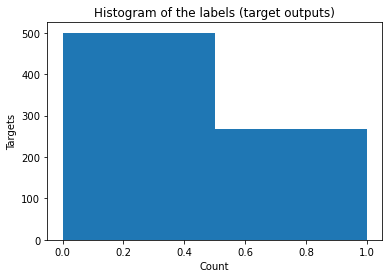

In [29]:
X = np.array(X, dtype=np.float64)
X_norm = np.array(X, dtype=np.float64)
for i in range(8):
    X_norm[:,i] = (X_norm[:,i] - np.mean(X_norm[:,i])) / np.std(X_norm[:,i])
#print (X)
#print (X_norm)
y = np.array(y, dtype=np.int8)
plt.hist(y,2,histtype='bar')
plt.title("Histogram of the labels (target outputs)")
plt.xlabel('Count') 
plt.ylabel('Targets')
plt.show()

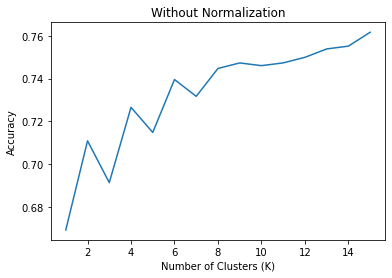

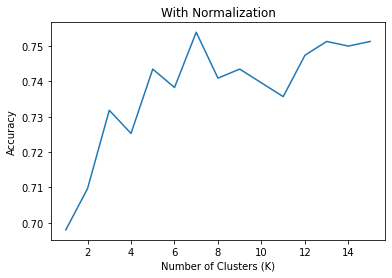

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

'''
Q2. Split the data into training and test sets with 80% training and 20% test data sizes

'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

'''

Q4. Process the input data by subtracting the mean (a.k.a. centralization) and dividing by the standard
deviation (a.k.a. standardization) over each dimension (feature), repeat the previous part.

'''
X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(X_norm, y, test_size=0.2)

#print(X_train)
#print(X_norm_train)

'''

Q2. (Continued) Use 5-fold cross-validation on training data to decide the best number of neighbours k. To this end,
you can use the built in functionality in scikit-learn such as cross_val_score (note that this function
returns the accuracy for each fold in an array and you have to average them to get the accuracy for
all splits). 

For k = 1, 2, 3, . . . , 15 compute the 5-fold cross validation error and plot the results (with 
values of k on the x-axis and accuracy on the y-axis). 

'''

def calculate_score(X,y):
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    avg_scores = []
    for i in range(1,16):
        model = KNeighborsClassifier(n_neighbors=i)
        scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
        avg_scores.append(np.mean(scores))
    avg_scores = np.array(avg_scores,dtype=np.float64)
    return avg_scores

avg_scores = calculate_score(X,y)

plt.plot(np.array(range(1,16), dtype=np.int8), avg_scores)
plt.title("Without Normalization")
plt.xlabel('Number of Clusters (K)') 
plt.ylabel('Accuracy')
plt.show()
    

avg_norm_scores = calculate_score(X_norm,y)

plt.plot(np.array(range(1,16), dtype=np.int8), avg_norm_scores)
plt.title("With Normalization")
plt.xlabel('Number of Clusters (K)') 
plt.ylabel('Accuracy')
plt.show()


In [14]:
'''

Q3. Evaluate the k-NN algorithm on test data with the optimal number of neighbours you obtained in
previous step and report the test error (you will use the same value of k you have found in 2.).

'''
knn = KNeighborsClassifier(n_neighbors=15) #since the accuracy without normalization is highest for K=15
knn.fit(X_train,y_train)
print("Testing accuracy/score:")
print(knn.score(X_test,y_test))

'''
Q4. Process the input data by subtracting the mean (a.k.a. centralization) and dividing by the standard
deviation (a.k.a. standardization) over each dimension (feature), repeat the previous part and report
the accuracy. Do centralization and standardization impact the accuracy?

'''

knn_norm = KNeighborsClassifier(n_neighbors=7) #since the accuracy with normalization is highest for K=7
knn_norm.fit(X_norm_train,y_norm_train)
print("\nTesting accuracy/score (after normalization): ")
print(knn_norm.score(X_norm_test,y_norm_test))

Testing accuracy/score:
0.7857142857142857

Testing accuracy/score (after normalization): 
0.7207792207792207


In [30]:
'''

Q4. Why?

'''
#Normalization has eliminated the outliers from the dataset, which were causing multiple extra classes earlier.